<a href="https://colab.research.google.com/github/DericsonPablo/CIFAR10-CNN-Classification/blob/master/CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import keras.utils
from keras import utils as np_utils
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.models import Sequential
import matplotlib.pyplot as plt
import itertools
import matplotlib.style as sty
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
# carregando dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()

print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

trainY = to_categorical(trainY)
testY = to_categorical(testY)

170500096/170498071 [==============================] - 11s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [0]:
# convertendo int -> float
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalizando entre 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

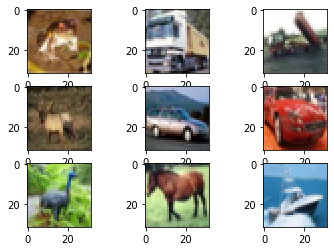

In [0]:
# plot 9 primeiras imagens
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(trainX[i])
pyplot.show()

In [0]:
model = Sequential()
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(trainX, trainY, batch_size=64)
steps = int(trainX.shape[0] / 64)

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
#model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#Inserir model.compile com os parametros desejados
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
results = model.fit_generator(it_train, steps_per_epoch=steps, epochs=15, validation_data=(testX, testY), verbose=1)

Epoch 1/15
781/781 [==============================] - 53s 68ms/step - loss: 1.8136 - acc: 0.3846 - val_loss: 1.4964 - val_acc: 0.4868
Epoch 2/15
781/781 [==============================] - 50s 65ms/step - loss: 1.1990 - acc: 0.5695 - val_loss: 1.0261 - val_acc: 0.6480
Epoch 3/15
781/781 [==============================] - 51s 66ms/step - loss: 0.9874 - acc: 0.6505 - val_loss: 0.8462 - val_acc: 0.7052
Epoch 4/15
781/781 [==============================] - 50s 64ms/step - loss: 0.8710 - acc: 0.6994 - val_loss: 0.7297 - val_acc: 0.7432
Epoch 5/15
781/781 [==============================] - 49s 63ms/step - loss: 0.8004 - acc: 0.7244 - val_loss: 0.6792 - val_acc: 0.7662
Epoch 6/15
491/781 [=================>............] - ETA: 18s - loss: 0.7462 - acc: 0.7433

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)       

In [0]:
score = model.evaluate(testX, testY, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

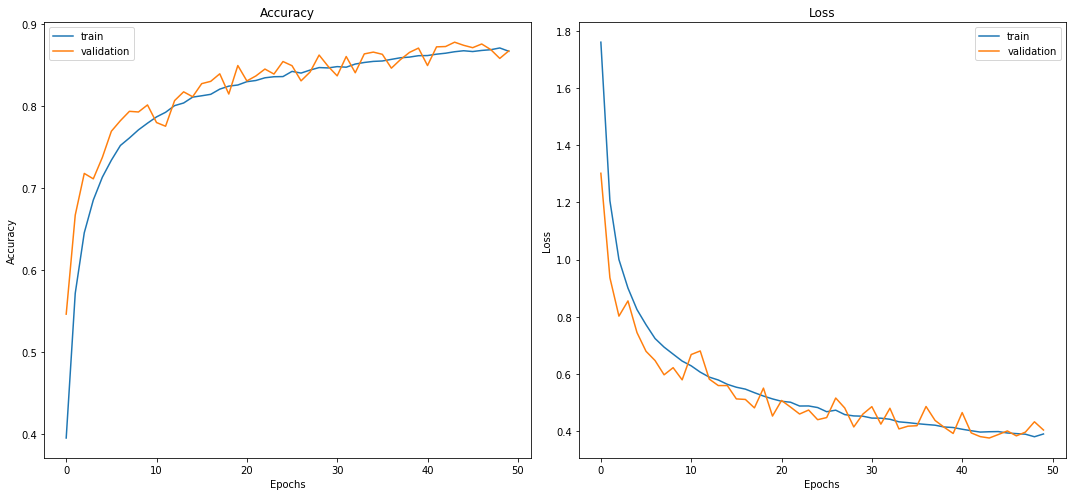

In [0]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(results.history['acc'], label='train')
plt.plot(results.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(results.history['loss'], label='train')
plt.plot(results.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Matriz de confusão sem normalização
[[858   9  20   7   8   1   9   1  63  24]
 [  2 956   0   1   1   0   4   0   2  34]
 [ 35   2 808  20  19  22  71  11   7   5]
 [ 11   5  42 694  22  77  95  17  10  27]
 [  8   1  42  13 823  12  76  21   4   0]
 [  2   3  29  75  20 789  42  26   3  11]
 [  3   3   7  11   1   0 970   0   3   2]
 [  9   4  10  10  21  22  11 903   2   8]
 [ 25  16   2   1   0   0   3   0 935  18]
 [  6  40   3   1   1   1   0   0   8 940]]


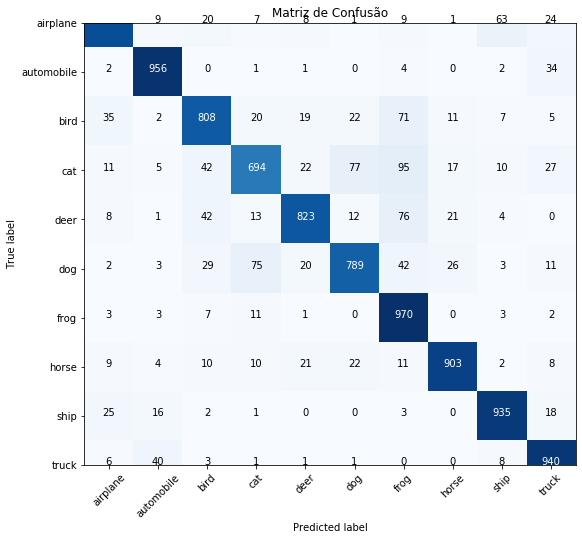

In [0]:
y_predict = model.predict_classes(testX)
# calcula a matriz de confusão
matrix = confusion_matrix(np.argmax(testY, axis=1),y_predict)
cm_plot_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

def plot_confusion_matrix(cm, classes, normalize=False, title=None, cmap = plt.cm.Blues):
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Matriz de confusão normalizada")
  else:
    print("Matriz de confusão sem normalização")
  print(cm)
  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j]> thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
 
plt.figure(figsize=(8,8))
plot_confusion_matrix(matrix, cm_plot_labels, title='Matriz de Confusão')